## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

# 試比較 save_best_only 與否的差異

In [1]:
import os
from tensorflow.python import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.python.keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from tensorflow.python.keras.callbacks import ModelCheckpoint

for i in range(2):
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(
        lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(
        loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model_ckpt = ModelCheckpoint(
        filepath="./tmp_best_only.h5" if i == 0 else "./tmp.h5",
        monitor="val_loss",
        save_best_only=i == 0)

    model.fit(
        x_train,
        y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(x_test, y_test),
        shuffle=True,
        callbacks=[model_ckpt])

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v1 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

Epoch 45/50
50000/50000 [==============================] - 5s 108us/sample - loss: 0.5564 - acc: 0.8388 - val_loss: 1.6121 - val_acc: 0.4955
Epoch 46/50
50000/50000 [==============================] - 5s 110us/sample - loss: 0.5398 - acc: 0.8454 - val_loss: 1.6296 - val_acc: 0.4887
Epoch 47/50
50000/50000 [==============================] - 6s 111us/sample - loss: 0.5248 - acc: 0.8506 - val_loss: 1.6414 - val_acc: 0.4895
Epoch 48/50
50000/50000 [==============================] - 5s 108us/sample - loss: 0.5065 - acc: 0.8570 - val_loss: 1.6659 - val_acc: 0.4902
Epoch 49/50
50000/50000 [==============================] - 5s 109us/sample - loss: 0.4901 - acc: 0.8643 - val_loss: 1.6669 - val_acc: 0.4892
Epoch 50/50
50000/50000 [==============================] - 6s 111us/sample - loss: 0.4741 - acc: 0.8695 - val_loss: 1.6823 - val_acc: 0.4850
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)  

Epoch 43/50
50000/50000 [==============================] - 5s 108us/sample - loss: 0.6118 - acc: 0.8158 - val_loss: 1.6039 - val_acc: 0.4906
Epoch 44/50
50000/50000 [==============================] - 6s 111us/sample - loss: 0.5959 - acc: 0.8212 - val_loss: 1.6262 - val_acc: 0.4840
Epoch 45/50
50000/50000 [==============================] - 5s 109us/sample - loss: 0.5761 - acc: 0.8304 - val_loss: 1.6394 - val_acc: 0.4868
Epoch 46/50
50000/50000 [==============================] - 5s 107us/sample - loss: 0.5614 - acc: 0.8366 - val_loss: 1.6336 - val_acc: 0.4873
Epoch 47/50
50000/50000 [==============================] - 5s 107us/sample - loss: 0.5435 - acc: 0.8429 - val_loss: 1.6746 - val_acc: 0.4894
Epoch 48/50
50000/50000 [==============================] - 5s 107us/sample - loss: 0.5264 - acc: 0.8484 - val_loss: 1.6772 - val_acc: 0.4827
Epoch 49/50
50000/50000 [==============================] - 5s 107us/sample - loss: 0.5104 - acc: 0.8552 - val_loss: 1.6779 - val_acc: 0.4883
Epoch 50/50
5

In [8]:
# Load back
model = keras.models.load_model("./tmp.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

# Load back save best only
model = keras.models.load_model("./tmp_best_only.h5")
loss_loadback_best_only, acc_loadback_best_only = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 98us/sample - loss: 1.4411 - acc: 0.5011


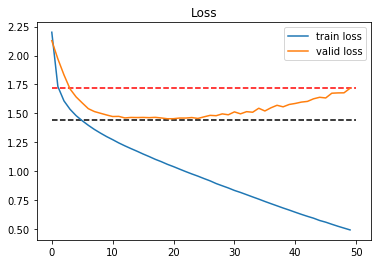

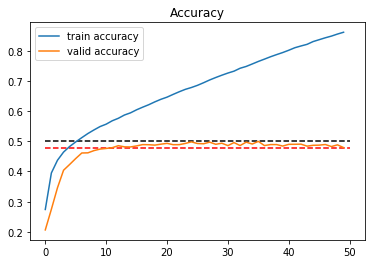

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.hlines(y=loss_loadback_best_only, xmin=0, xmax=len(train_loss), colors='k', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.hlines(y=acc_loadback_best_only, xmin=0, xmax=len(train_loss), colors='k', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

# 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [27]:
keras.backend.clear_session()
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(
    lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(
    loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

model_ckpt = ModelCheckpoint(
    filepath="./tmp_weights_only.h5",
    monitor="val_loss",
    save_weights_only=True,
    save_best_only=True)

model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test),
    shuffle=True,
    callbacks=[model_ckpt])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v1 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 128)               512       
__________

Epoch 49/50
50000/50000 [==============================] - 5s 107us/sample - loss: 0.5095 - acc: 0.8567 - val_loss: 1.6864 - val_acc: 0.4850
Epoch 50/50
50000/50000 [==============================] - 5s 109us/sample - loss: 0.4926 - acc: 0.8619 - val_loss: 1.6761 - val_acc: 0.4871


In [28]:
keras.backend.clear_session()
model = build_mlp(input_shape=x_train.shape[1:])
model.load_weights("./tmp_weights_only.h5")
model.summary()
model.compile(
    loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)
model.predict(x_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v1 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 128)               512       
__________

array([[4.1724402e-02, 4.5715623e-02, 1.4106493e-01, ..., 2.5167477e-03,
        4.7609337e-02, 6.3357488e-03],
       [1.9933775e-02, 3.8959648e-02, 3.3255512e-04, ..., 7.6468574e-04,
        1.6778840e-01, 7.7008963e-01],
       [6.2255615e-01, 8.3403364e-02, 2.4404345e-02, ..., 1.9650647e-02,
        1.7391148e-01, 7.0811771e-02],
       ...,
       [1.5870514e-03, 1.8103516e-03, 4.0650222e-01, ..., 1.4792865e-02,
        2.4975277e-03, 1.2674351e-03],
       [4.1185785e-02, 6.4519383e-02, 3.4869057e-01, ..., 5.1280506e-02,
        5.9145736e-03, 6.5929122e-02],
       [3.8663115e-02, 1.3348440e-02, 9.8511226e-02, ..., 5.8211333e-01,
        3.5575170e-02, 2.2283975e-02]], dtype=float32)